##  Classification Problem using Bank Marketing Data
#### Prepared By : Kisha Taylor
#### Date : September 17th 2019 

This is a Machine Learning project using Python where we are predicting if customers will subscribe (Yes/No) to a bank term deposit based on their customer attributes. Since, the target variable is discrete this will be a classification problem.

- Imbalanced Classes addressed using an over-sampling technique called SMOTE.
- Performance metric used : AUC.


# ML Pipeline / Methodology for Model Building
### Steps : 
 1. Problem Definition
 
 2. Data Collection 
     - Dataset : Boston Housing Market readily available
     
 3. Data Preparation 
 
     (i)   Data Exloration & Analysis
     
     (ii)  Data Cleaning
     
     (iii) Split into Train and Test
     
     (iv)  Feature Generation &/Or Feature Selection
           - For Logistic Regression we drop redundant features using VIF
             & we subset features based on Feature Importance ranking using Random Forest
             Both subset of features are used to train the Logistic Regression model.
             
           - Note,however, all other models are trained with all features. 
      
      (v)  Data Preprocessing
     
           - Scale features where appropriate
           
 4. Train Model
 
 5. Validate Model & Tune Model hyperparameters
 
 6. Test Model assumptions 
       (Eg. assumptions of logistic regression model)
       
 7. Select best model 
 
 8. Report results
 
 9. Conclusion

## List of models used :
    1. Logistic Regression 
              - using subset of features
    
    2. Decision Tree
              - using all features
    
   **_Ensemble Models_** :
    3. Random Forest
              - using all features
              
    4. Gradient Boosted Tree
              - using all features
    5. Extreme Gradient Boosted Tree (XGBoost)
    

##### Dataset Information (taken directly from website, see below :):

Bank Marketing dataset:  https://archive.ics.uci.edu/ml/datasets/Bank%2BMarketing
        
"Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


Attribute Information:

Input variables:
##### bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
##### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
##### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
##### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

#### Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')"

# 1. Problem Definition :
    
Predict whether or not a client will subscribe to a term deposit when offered based
on attributes related to the specfic client's personal profile, social and economic conditions etc.

# 2. Data Collection
We collected our real-world data from the following source :
Bank Marketing dataset:  https://archive.ics.uci.edu/ml/datasets/Bank%2BMarketing
    

In [1]:
path = "C:/Users/Kisha/Documents/Datasets/bank-full.csv"

We will be importing the usual basic modules used in a typical data science project.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import sklearn

In [3]:
#loading our data into a dataframe
df = pd.read_csv(path,";")

# 3. Data Preparation 

###      (i)   Data Exploration
#### We now explore and analyze the data to help us understand the data, this is key before we can think about extracting insights.

#### What do we need to understand about the data?
-	What is the structure and size of the dataset.
Eg. How many different features and rows or how fat/slim and short/tall ?
Width (fat or slim) is in reference to the number of features (columns in the datset).
The height of the dataset refers to the number of rows. So, a short and fat dataset has fewer rows than columns.
-	What kinds of variables are there ? Numeric or categorical
-	What are the values of the features?
-	How is each feature distributed ? Eg Normal distribution 
-	Basic descriptive statistics for each variable. Eg. Min, Max, Std Dev.  
-	Which variable is the target variable ? 
Is it categorical or numeric ?
	If categorical/discrete, how many in each class, is it an imbalanced class problem 
      (meaning significantly more instances belonging to a particular class versus another)?
#### Note : In our case, our target variable is discrete as we are performing classification.

#### Dataset structure

Number of rows & columns respectively (fairly tall and thin)

In [4]:
df.shape

(45211, 17)

Viewing entire dataset of columns and few rows

In [5]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


View the dataset with basic descriptive statistics for numerical attributes only

In [6]:
df.describe().head(10)

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
print("Attributes:\n",df.columns.values)
print("\n# attributes:",len(df.columns.values))


Attributes:
 ['age' 'job' 'marital' 'education' 'default' 'balance' 'housing' 'loan'
 'contact' 'day' 'month' 'duration' 'campaign' 'pdays' 'previous'
 'poutcome' 'y']

# attributes: 17


In [8]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Let's **drop the duration column** since we are told that this feature cannot be predetermined.

In [9]:
df=df.drop(['duration'],axis=1)
df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'], dtype=object)

##### identifying missing values

In [10]:
df.isnull().sum()
#Number of missing values per column 


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

no missing values in columns

In [11]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no


In [12]:
#count of features in entire dataset
cntf = df.shape[1]

Examining each variable to assess its distribution using a histogram


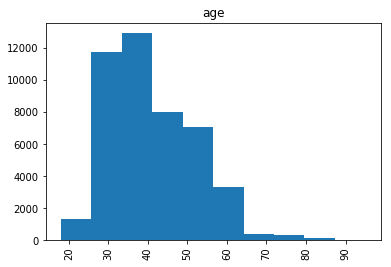

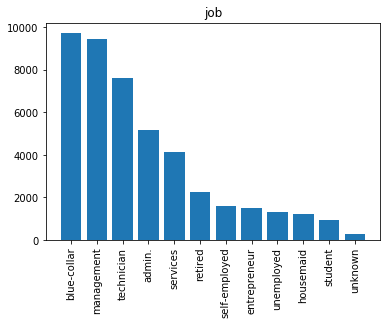

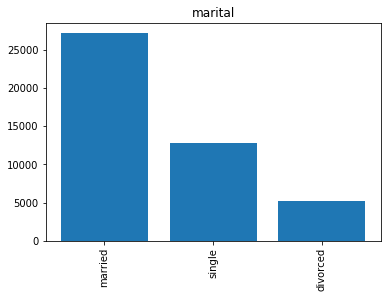

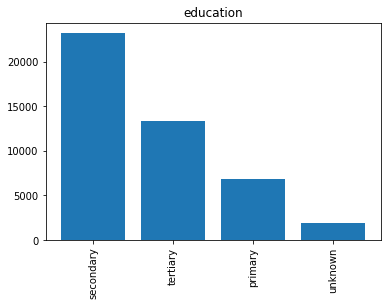

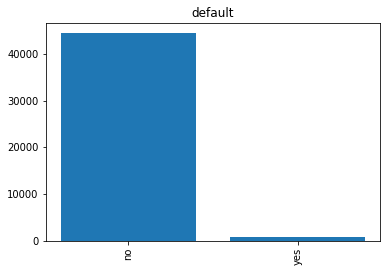

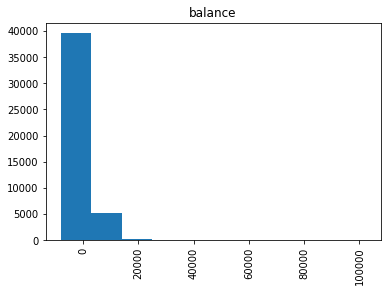

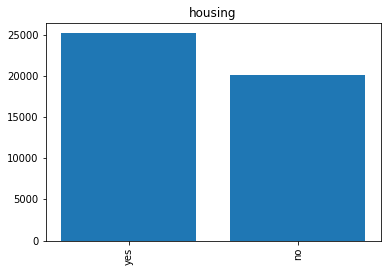

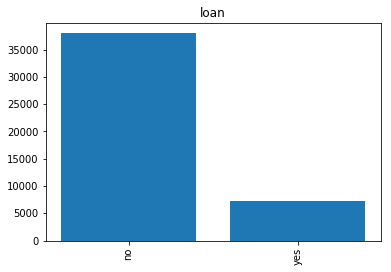

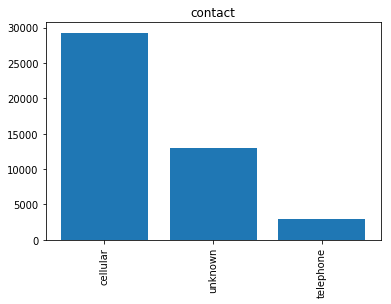

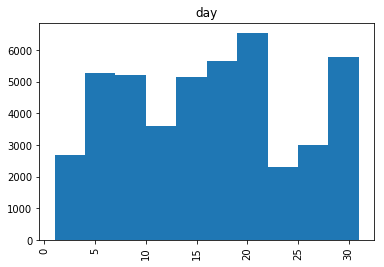

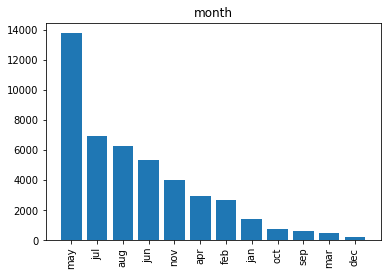

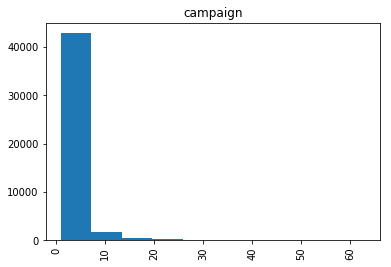

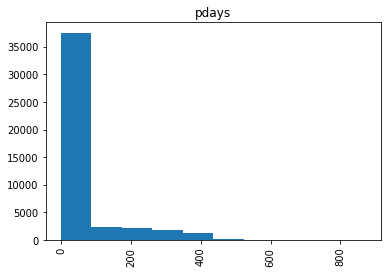

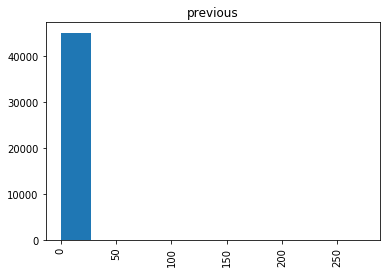

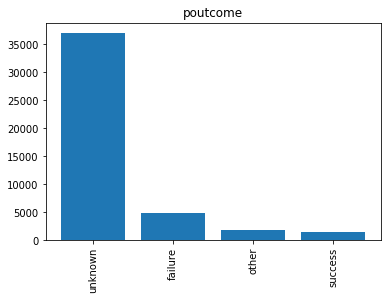

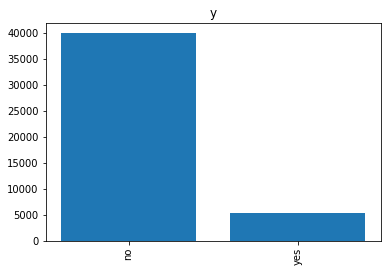

Attributes: ['age' 'job' 'marital' 'education' 'default' 'balance' 'housing' 'loan'
 'contact' 'day' 'month' 'campaign' 'pdays' 'previous' 'poutcome' 'y']

 Indices of Categorical attributes: [1, 2, 3, 4, 6, 7, 8, 10, 14, 15]

 Indices of numerical attributes [0, 5, 9, 11, 12, 13]


In [13]:
def VizCategNnum(df):
    #Takes a dataframe as the input and returns
    #the row indices for Categorical & numeric vars 
   
    ncol = df.shape[1]
    #ncolplt = 4
    #nrowplt = round(ncol/ncolplt)
    #mydict ={}
    strInxCol = []
    numInxCol =[]
    for i in range(0,ncol):
        xcol = df.iloc[0,i]
        namecol= df.columns.values[i]
        xtype = type(xcol)
        if xtype ==str:
            xtype ="str"
            strInxCol.append(i)
            counts = df.iloc[:,i].value_counts()
            plt.bar(counts.index, counts.values)
        else:
            xtype="int"
            numInxCol.append(i)
            plt.hist(df.iloc[:,i])
        plt.xticks(rotation=90)
        plt.title(df.columns.values[i])
        plt.show()
       
    return(strInxCol,numInxCol)

res = VizCategNnum(df)
strInxCol = res[0]
numInxCol = res[1]

print("Attributes:",df.columns.values)
print("\n Indices of Categorical attributes:",strInxCol)
print("\n Indices of numerical attributes",numInxCol)



{'whiskers': [<matplotlib.lines.Line2D at 0x1ade90e710>,
 'caps': [<matplotlib.lines.Line2D at 0x1ade90efd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ade90e5c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ade915860>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ade915c88>],
 'means': []}

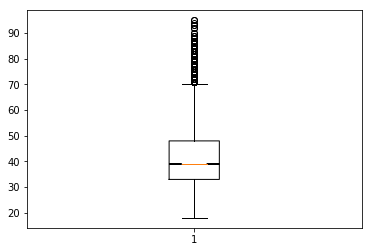

In [14]:
agebox = plt.boxplot(df["age"],"age")
agebox

##### Converting categorical variables to dummy variables

Recall, we identified the categorical vars when vizualizing each feature in a histogram

In [15]:
print("Attributes:",df.columns.values)
print("\n Indices of Categorical attributes:",strInxCol)
print("\n Indices of numerical attributes",numInxCol)



Attributes: ['age' 'job' 'marital' 'education' 'default' 'balance' 'housing' 'loan'
 'contact' 'day' 'month' 'campaign' 'pdays' 'previous' 'poutcome' 'y']

 Indices of Categorical attributes: [1, 2, 3, 4, 6, 7, 8, 10, 14, 15]

 Indices of numerical attributes [0, 5, 9, 11, 12, 13]


Then we create the dummy vars


In [16]:
newdf= pd.DataFrame()
for i in strInxCol:
    dummydf = pd.get_dummies(df.iloc[:,i])
    Cname = df.columns.values[i]
    lenC = dummydf.shape[1]
    listCn =[]
    for j in range(0,lenC):
        listCn.append(Cname + "_"+dummydf.columns.values[j])
    dummydf.columns = listCn
    newdf = pd.concat([newdf,dummydf],axis=1)
newdf.head(5)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
3,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0


In [17]:
newdf=pd.concat([df.iloc[:,numInxCol],newdf],axis=1)
newdf.head(5)

,age,balance,day,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,58,2143,5,1,-1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
1,44,29,5,1,-1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2,33,2,5,1,-1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
3,47,1506,5,1,-1,0,0,1,0,0,...,1,0,0,0,0,0,0,1,1,0
4,33,1,5,1,-1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0


Determining the class with the greater number of instances

In [18]:
mydict= {}
mydict["y_yes"] = len(newdf[newdf["y_yes"]==1])
mydict["y_no"] = len(newdf[newdf["y_yes"]==0])
maxKey = max(mydict,key= lambda x:mydict.get(x))
maxKey



'y_no'

#### Is there a significant imbalance of classes in our dataset ?

In [19]:
print("MaxKey:"+str(maxKey)+", value:"+str(mydict.get(maxKey)))
minKey = min(mydict,key= lambda x:mydict.get(x))
minKey
print("MinKey:"+str(minKey)+", value:"+str(mydict.get(minKey)))
aMin= mydict.get(minKey)
aMax = mydict.get(maxKey)
Ratioa= aMax/aMin
print("Count of y_no =1 vs y_yes=1, Ratio MaxKey:MaxKey = " +str(round(Ratioa,1)) +":"+str(1))
totCnt=aMin+aMax
print("Percentage of y_no %:",(round((aMax*100/totCnt),3)))
print("Percentage of y_yes %:",(round((aMin*100/totCnt),3)))

MaxKey:y_no, value:39922
MinKey:y_yes, value:5289
Count of y_no =1 vs y_yes=1, Ratio MaxKey:MaxKey = 7.5:1
Percentage of y_no %: 88.302
Percentage of y_yes %: 11.698


#### Observation : Yes we have a significant class imbalance problem.

Text(0,0.5,'Frequency')

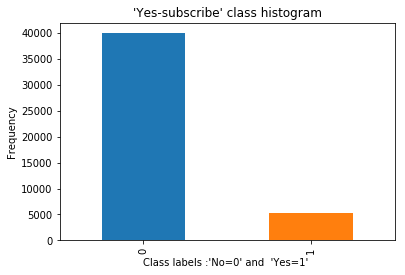

In [20]:
pd.value_counts(newdf['y_yes']).plot.bar()
plt.title("'Yes-subscribe' class histogram")
plt.xlabel("Class labels :'No=0' and  'Yes=1' ")
plt.ylabel('Frequency')
#newdf['y_yes'].value_counts()

In [21]:
newdf = newdf.drop(['y_no'],axis=1)
newdf.columns.values

array(['age', 'balance', 'day', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'y_yes'], dtype=object)

In [22]:
newdf.head(5)

,age,balance,day,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,1,-1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,44,29,5,1,-1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,33,2,5,1,-1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
3,47,1506,5,1,-1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,33,1,5,1,-1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


##### Further Pre-processing by splitting the dataset into train and test
This is done prior to any feature selection. 

Perform feature selection on training dataset only
Ref. : https://machinelearningmastery.com/an-introduction-to-feature-selection/

In [23]:
from sklearn.model_selection import train_test_split

# Using stratefied sampling ensures that the proportion of classes is maintained in training & test dataset  
train,test = train_test_split(newdf,stratify=newdf['y_yes'],test_size=0.3)


Note results below confirm we have the proportion of class imbalance
before and after the split is the same.

In [24]:
Num_Yes0 = sum(1 for i in train['y_yes'] if i==0)
Num_Yes1 = sum(1 for i in train['y_yes'] if i==1)

Total_Yes0_1 = Num_Yes0 + Num_Yes1

print("Num_Yes0 =",Num_Yes0)
print("% Num_Yes0 =",Num_Yes0*100/Total_Yes0_1,"%","\n")

print("Num_Yes1=",Num_Yes1)
print("% Num_Yes1 =",Num_Yes1*100/Total_Yes0_1,"%")

Num_Yes0 = 27945
% Num_Yes0 = 88.30220874016494 % 

Num_Yes1= 3702
% Num_Yes1 = 11.697791259835055 %


## <font color= blue> Data Analysis 

#### Performing a correlation analysis to identify and remove highly correlated features in feature selection phase. 

#### Plot correlation matrix to see the relationship between variables concatenate X and Y

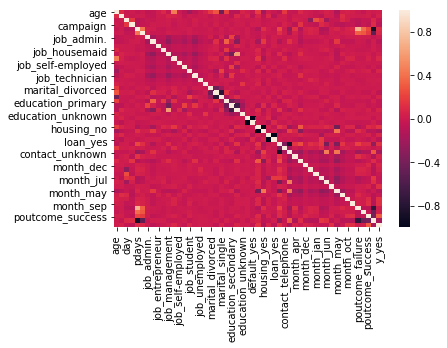

In [25]:

train_corrMat = train.corr()

train_corrMat.style.background_gradient()
sns.heatmap(train_corrMat)


In [26]:
train_corrMat

,age,balance,day,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_yes
age,1.000000,0.100513,-0.009511,0.005216,-0.024873,-0.002837,-0.056353,-0.042764,0.020744,0.091302,...,0.020764,-0.127614,0.033675,0.053947,0.035954,-0.005044,-0.025759,0.029070,0.003656,0.027418
balance,0.100513,1.000000,0.004077,-0.014940,0.001526,0.015330,-0.027464,-0.050687,0.013493,0.003045,...,0.023360,-0.070328,0.113327,0.037028,0.027538,0.008361,0.012583,0.032587,-0.028369,0.053380
day,-0.009511,0.004077,1.000000,0.161174,-0.091535,-0.050873,-0.008375,-0.022728,0.001423,0.005285,...,-0.019467,-0.019219,0.093265,0.034459,-0.046971,-0.067140,-0.034823,-0.026801,0.084345,-0.024853
campaign,0.005216,-0.014940,0.161174,1.000000,-0.088437,-0.030259,-0.019422,0.007915,0.002926,0.005752,...,-0.020566,-0.065612,-0.086822,-0.051721,-0.038371,-0.087937,-0.018906,-0.056181,0.106663,-0.073226
pdays,-0.024873,0.001526,-0.091535,-0.088437,1.000000,0.429456,0.033750,0.017910,-0.018245,-0.033074,...,0.038242,0.077589,0.007504,0.054819,0.086121,0.703429,0.383291,0.228384,-0.868655,0.105699
previous,-0.002837,0.015330,-0.050873,-0.030259,0.429456,1.000000,0.016647,-0.014504,-0.015444,-0.019562,...,0.029282,0.003046,0.033695,0.048880,0.061829,0.330699,0.298302,0.179172,-0.502242,0.081084
job_admin.,-0.056353,-0.027464,-0.008375,-0.019422,0.033750,0.016647,1.000000,-0.186521,-0.065574,-0.061074,...,0.013969,0.023092,-0.008141,0.011068,0.008527,0.023791,0.012149,0.012801,-0.031332,0.003593
job_blue-collar,-0.042764,-0.050687,-0.022728,0.007915,0.017910,-0.014504,-0.186521,1.000000,-0.095980,-0.089394,...,-0.042592,0.164337,-0.046966,-0.042189,-0.047638,0.002852,-0.001505,-0.055934,0.024578,-0.074479
job_entrepreneur,0.020744,0.013493,0.001423,0.002926,-0.018245,-0.015444,-0.065574,-0.095980,1.000000,-0.031428,...,-0.017907,-0.006066,0.042660,-0.011188,-0.007234,-0.002025,-0.015408,-0.024503,0.020939,-0.019276
job_housemaid,0.091302,0.003045,0.005285,0.005752,-0.033074,-0.019562,-0.061074,-0.089394,-0.031428,1.000000,...,0.001579,-0.068859,-0.015618,0.000274,-0.003143,-0.018338,-0.017985,-0.015153,0.031023,-0.015544


###### Sorting Correlation matrix in ascending order by correlation value with respect to the target variable. 
convert to dataframe & Sorting 

In [27]:
train_corrMat
train_corrMat = pd.DataFrame(train_corrMat,columns=train_corrMat.columns, index=train_corrMat.columns).abs().sort_values(by='y_yes',axis=1,ascending=True)

In [28]:
train_corrMat["y_yes"].sort_values(ascending=False)

y_yes                  1.000000
poutcome_success       0.304732
poutcome_unknown       0.167528
contact_unknown        0.149235
housing_no             0.141403
housing_yes            0.141403
contact_cellular       0.134701
month_oct              0.134483
month_mar              0.130845
month_sep              0.126683
pdays                  0.105699
month_may              0.101551
job_retired            0.083235
previous               0.081084
job_blue-collar        0.074479
job_student            0.073759
campaign               0.073226
loan_yes               0.072417
loan_no                0.072417
month_dec              0.064397
education_tertiary     0.064272
marital_single         0.059006
month_apr              0.057457
marital_married        0.055771
balance                0.053380
month_feb              0.040614
education_primary      0.038966
education_secondary    0.036064
poutcome_other         0.033788
month_jul              0.031909
job_management         0.030251
age     

**Observation** : No individual variable has a strong correlation with the target variable.
              Note, maximum correlation is 0.30, which is considered low.

#### Multicollinearity check 
Let's examine the correlation among independent features

The function below called "drophighCorrVar" 
performs the following steps:
    
**Step #1** : We essentially are checking every element (i.e. correlation value) in every column (i.e. for each feature) 
in the correlation matrix.

**Step #2** : We check for a correlation value that exceeds our threshold (i.e high correlation values). 
We flag that feature to be dropped since it has a high correaltion with another feature only if the feature to which it is highly correlated has Not already been dropped. __We only drop variables that are above the threshold and not equal to 1 since that would be indicating its correlation with itself.__


**Note**:

(i) We are working with a correlation matrix already sorted by the magnitude of the correlation with the dependent valriable "Median Price". This ensures that we first consider dropping the variables that have the least correlation to our dependent var.

(ii) we keep track of the features by the index.

In [29]:
def dropHighCorrVar(CMat): 

# input : correlation matrix sorted in asc order by absolute value of 
# correlation with MedianPrice (target var.) standard to regard
# highly correlated variables as having values >0.6
# Outputs droplist, list of indices that are highly correlated with at least one other variable.

     
    threshold = 0.6
    features =CMat.columns
    nfeat = len(features)
    droplist= []
    findx = -1
    for f in features[0:(nfeat-1)]:
        #print("\nStart...Main feature being assessed: ",f)
        #print("\nStart... Values being assessed \n",CMat[f].abs)  

        findx +=1
        rowindx = -1
        for x in CMat[f].abs():
            if rowindx <(nfeat-1):
                rowindx +=1
                #print("Other feature: ",CMat.index[rowindx])
                #print("correlated value of main feature: "+ str(f) + "  with other feature: " +str(CMat.index[rowindx])+ " "+ str(x))
                #print("\nCurent droplist",droplist)
                #print(CMat.columns[droplist].values)
                if (x > threshold and x<1):
                    if (rowindx not in droplist):
                        #print("\nfeature to be dropped:",f)
                    # only drop the feature if the corresponding feature (to which it is highly correlated)
                    # is not already in drop list (i.e not already going to be dropped).
                        droplist.append(findx)
                        break
            else:
                break 
    return(droplist)

Getting the Index of the redundant features

In [30]:
redundantfeaturesIndxlist= dropHighCorrVar(CMat=train_corrMat)

In [31]:
print("redundant features to be dropped : \n",train_corrMat.index[redundantfeaturesIndxlist].values)

redundant features to be dropped : 
 ['job_admin.' 'marital_single' 'education_tertiary' 'loan_no' 'loan_yes'
 'month_jun' 'month_oct' 'poutcome_other' 'poutcome_success']


### <font color=blue>Feature Selection 
##### Performed after correlation analysis in data analysis phase revealed redundant features.
           - For Logistic Regression we drop redundant features using VIF
             & we subset features based on Feature Importance ranking using Random Forest
             Both subset of features are used to train the Logistic Regression model.
             
           - Note,however, all other models are trained with all features. 

In [32]:
redundantfeatureslist = train_corrMat.columns[redundantfeaturesIndxlist] 
print("redundant featureslist:",redundantfeatureslist)

train_corrMat = train_corrMat.drop(redundantfeatureslist,axis=1)
train_corrMat = train_corrMat.drop(redundantfeatureslist,axis=0)

redundant featureslist: Index(['poutcome_failure', 'job_management', 'education_secondary',
       'marital_single', 'education_tertiary', 'pdays', 'contact_cellular',
       'contact_unknown', 'poutcome_unknown'],
      dtype='object')


In [33]:
print("Retained features :",train_corrMat.columns.values)

Retained features : ['job_self-employed' 'marital_divorced' 'job_unknown' 'job_admin.'
 'job_technician' 'month_aug' 'month_jan' 'contact_telephone'
 'education_unknown' 'job_housemaid' 'month_nov' 'month_jun'
 'job_entrepreneur' 'job_unemployed' 'default_yes' 'default_no' 'day'
 'job_services' 'age' 'month_jul' 'poutcome_other' 'education_primary'
 'month_feb' 'balance' 'marital_married' 'month_apr' 'month_dec' 'loan_no'
 'loan_yes' 'campaign' 'job_student' 'job_blue-collar' 'previous'
 'job_retired' 'month_may' 'month_sep' 'month_mar' 'month_oct'
 'housing_yes' 'housing_no' 'poutcome_success' 'y_yes']


#### VIF (Variance Inflation Factor) 

###### Let us see the redundant features listing after using VIF (Variance Inflation Factor) 
VIF tells us how much the variance in the model has been inflated consequent on 
multicolinearity on the model.
VIF = 1 means no correlaation at all.
if VIF is between 1 & 5 : this means there is moderate correlation
while VIF > 5 means multicollinearity exists.

Note : The VIF for a particular feature is calculated by regressing the feature 
against all the other features. The formula is : VIFj = 1/(1-Rsq_j). So, feature_j 
is the dependent feature and all the other features are predictor variables in the model. 
Based on the formula, if Rsq_j approaches 1 then the value of VIF approaches infinity.
If Rsq =0 ( other features do not influence any variance in featurej, the dependent var) 
then the VIF = 1.   

In [34]:
# Calculate VIF for each feature -Ref: https://etav.github.io/python/vif_factor_python.html

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
def calcVIF(Df,newf):

# This function takes a Dataframe as input and the feature being assessed for multicollinearity.
        
    vif = pd.DataFrame()
    vif["VIF factor"] = [variance_inflation_factor(Df[newf.values].values,i) for i in range(len(newf))]
    vif["features"] = newf
    vif = vif.sort_values(by='VIF factor')
    return(vif)

VIF_fdropnames =[] 
nfeatures = len(newdf.columns.values)
print(newdf.columns.values[nfeatures-1])

Xfeatures = newdf.columns[0:(nfeatures-1)]
print(Xfeatures)
VIF_Df = calcVIF(newdf,Xfeatures)
Cntfac = len(VIF_Df["VIF factor"]) -1
#print(Cntfac)
#print(VIF_Df)

y_yes
Index(['age', 'balance', 'day', 'campaign', 'pdays', 'previous', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')


C:\Users\Kisha\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [36]:
len(newdf.columns.values)
nfeatures = len(newdf.columns.values)
print(newdf.columns.values[nfeatures-1])

y_yes


Note that we iteratively removed features, recalculating VIF on each step
Instead of simply dropping features based on the VIF values simultaneously, we drop features iteratively. That is we recalculate the VIf after a feature is dropped. Notice how the VIF values change in many cases after a feature is removed.

If we dropped all the features in one step based on the initial VIF values we would have dropped features with high corelation to the dependent variable eg. 'LSTAT'. This feature was initially reflecting a VIF of 11.09 which is >10 so we would have dropped it. However, after removing other features and recalculating the VIF the LSTAT's VIF fell below the threshold of 10 and hus was not removed.

In [37]:
newDf = newdf[Xfeatures]
vifvalueMax = VIF_Df["VIF factor"].iloc[Cntfac]

while vifvalueMax> 5:
    f=VIF_Df["features"].iloc[Cntfac]
    print("Dropping redundant feature: ",f,"with VIF value of:",vifvalueMax,"in previous VIF table")
    VIF_fdropnames.append(f)
    newDf = newDf.drop(f,1)
    Cntfac = Cntfac-1
    print("Row #Cnt:",Cntfac)
    newf = newDf.columns
    VIF_Df = calcVIF(newDf,newf)
    print("\nRecalculated VIF table-after dropping redundant feature:",f)
    #print(VIF_Df)
    vifvalueMax=VIF_Df["VIF factor"].iloc[Cntfac]

Dropping redundant feature:  poutcome_unknown with VIF value of: inf in previous VIF table
Row #Cnt: 48


C:\Users\Kisha\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)



Recalculated VIF table-after dropping redundant feature: poutcome_unknown
Dropping redundant feature:  education_unknown with VIF value of: inf in previous VIF table
Row #Cnt: 47

Recalculated VIF table-after dropping redundant feature: education_unknown
Dropping redundant feature:  housing_no with VIF value of: inf in previous VIF table
Row #Cnt: 46

Recalculated VIF table-after dropping redundant feature: housing_no
Dropping redundant feature:  job_blue-collar with VIF value of: inf in previous VIF table
Row #Cnt: 45

Recalculated VIF table-after dropping redundant feature: job_blue-collar
Dropping redundant feature:  contact_unknown with VIF value of: inf in previous VIF table
Row #Cnt: 44

Recalculated VIF table-after dropping redundant feature: contact_unknown
Dropping redundant feature:  month_apr with VIF value of: inf in previous VIF table
Row #Cnt: 43

Recalculated VIF table-after dropping redundant feature: month_apr
Dropping redundant feature:  marital_divorced with VIF val

In [38]:
print("After dropping redundant features:")
print(VIF_Df.sort_values(by='VIF factor'))
print("\nRedundant features to be dropped from our dataset using VIF factor:\n",sorted(VIF_fdropnames))
print("\nRedundant features to be dropped from our dataset using Pearson's correlation matrix :\n",sorted(redundantfeatureslist.values))

After dropping redundant features:
    VIF factor            features
18    1.032738         default_yes
13    1.040240         job_unknown
23    1.053411           month_dec
28    1.102433           month_mar
21    1.131474   contact_telephone
32    1.140376           month_sep
5     1.141446       job_housemaid
12    1.144993      job_unemployed
31    1.165325           month_oct
10    1.175350         job_student
35    1.181025    poutcome_success
4     1.204416    job_entrepreneur
8     1.234788   job_self-employed
0     1.247585             balance
20    1.254443            loan_yes
34    1.254819      poutcome_other
25    1.258512           month_jan
7     1.265016         job_retired
9     1.411498        job_services
33    1.452230    poutcome_failure
16    1.460108   education_primary
24    1.499784           month_feb
2     1.501760            previous
3     1.534938          job_admin.
30    1.764540           month_nov
1     1.900982            campaign
11    1.918667      

#### Looking at correlation of redundant features to the dependent variable using an extract/subset of our correlation matrix
Note all have very low correlations (i.e. magnitude <0.20)

In [39]:
newdf.corr()['y_yes'][VIF_fdropnames].sort_values()

poutcome_unknown      -0.167051
contact_unknown       -0.150935
job_blue-collar       -0.072083
education_secondary   -0.036388
day                   -0.028348
marital_divorced       0.002772
education_unknown      0.012053
default_no             0.022419
age                    0.025155
month_apr              0.065392
loan_no                0.068185
pdays                  0.103621
contact_cellular       0.135873
housing_no             0.139173
Name: y_yes, dtype: float64

#### Correlation of features retained with the dependent variable

In [40]:
newdf.corr()['y_yes'][VIF_Df["features"]].sort_values()

features
housing_yes          -0.139173
month_may            -0.102500
campaign             -0.073172
loan_yes             -0.068185
marital_married      -0.060260
education_primary    -0.040393
month_jul            -0.034382
job_services         -0.027864
default_yes          -0.022419
job_entrepreneur     -0.019662
month_jun            -0.016805
job_housemaid        -0.015195
month_nov            -0.014937
job_technician       -0.008970
month_jan            -0.008783
month_aug            -0.008536
job_unknown           0.000267
job_self-employed     0.000855
job_admin.            0.005637
poutcome_failure      0.009885
contact_telephone     0.014042
job_unemployed        0.020390
poutcome_other        0.031955
job_management        0.032919
month_feb             0.038417
balance               0.052838
marital_single        0.063526
education_tertiary    0.066448
month_dec             0.075164
job_student           0.076897
job_retired           0.079245
previous              0.093236

In [41]:
XYtrain = newdf.drop(VIF_fdropnames,axis=1)
XYtrain.head(10)

,balance,campaign,previous,job_admin.,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,y_yes
0,2143,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,29,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1506,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,231,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,447,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,2,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,121,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
9,593,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [42]:
print("The predictor variables (features) we retained after dropping redundant ones : \n")
newfeatures = XYtrain.drop("y_yes",axis=1).columns
print(str(newfeatures))

The predictor variables (features) we retained after dropping redundant ones : 

Index(['balance', 'campaign', 'previous', 'job_admin.', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single', 'education_primary',
       'education_tertiary', 'default_yes', 'housing_yes', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other',
       'poutcome_success'],
      dtype='object')


# Feature selection using embedded feature selection technique : Tree-based RandomForest.

           - These top features based on the feature importance ranking in Random Forest are used 
             to train the Logistic Regression model exclusively. All other models are trained with all features. 
          

In [43]:
# importing the RandomForestClassifier class from the ensemble module in the sklearn package
from sklearn.ensemble import RandomForestClassifier

# Parameters : "n_jobs = -1" means all processors being used. | "random_state =0" means seed for random generator | criterion = "gini" 
#              "n_estimators=1000" number of trees 
# ref: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

#creating the Random forest classifier object
rfc = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=-1)



In [44]:
xtrain = train.drop(['y_yes'],axis=1)
ytrain = train['y_yes']
print(xtrain.head(5))
print(ytrain.head(5))

       age  balance  day  campaign  pdays  previous  job_admin.  \
33456   30      312   20         3     -1         0           1   
35341   46    -1034    7         1     -1         0           0   
2230    35      855   12         3     -1         0           1   
3295    40        0   15         1     -1         0           0   
26763   45     3559   20         1     -1         0           0   

       job_blue-collar  job_entrepreneur  job_housemaid        ...         \
33456                0                 0              0        ...          
35341                0                 0              0        ...          
2230                 0                 0              0        ...          
3295                 0                 1              0        ...          
26763                0                 0              0        ...          

       month_jun  month_mar  month_may  month_nov  month_oct  month_sep  \
33456          0          0          0          0          

In [45]:
rfc.fit(xtrain,ytrain)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

#### Feature importance using Random Forest Classifier

In [46]:
#Creating Data frame of features sorted by rank - descending order
rank = pd.DataFrame({'Column_name':xtrain.columns.values.tolist(),'importance_rank':rfc.feature_importances_.tolist()}).sort_values(by=['importance_rank'],ascending=False)
print("Top 10 features:")
print(rank.head(10))
print("Top 3 features:")
print(rank.head(3))


Top 10 features:
            Column_name  importance_rank
1               balance         0.169555
0                   age         0.146429
2                   day         0.123303
3              campaign         0.062448
4                 pdays         0.047532
48     poutcome_success         0.047376
5              previous         0.025884
22  education_secondary         0.015673
23   education_tertiary         0.014099
27           housing_no         0.013867
Top 3 features:
  Column_name  importance_rank
1     balance         0.169555
0         age         0.146429
2         day         0.123303


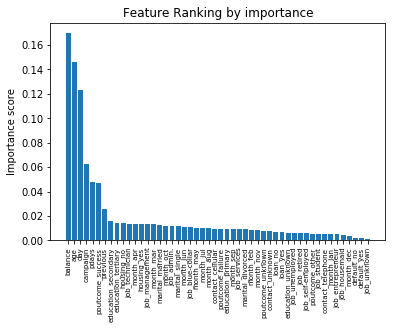

In [47]:
plt.bar(rank['Column_name'],rank['importance_rank'])
plt.title('Feature Ranking by importance')
plt.ylabel('Importance score')
plt.xticks(rotation=90,fontsize=7)
plt.show()


In [48]:
# Train Logistic Regression model using the top 3 features
top3features = rank.head(3).iloc[0:3,0]

top3features

1    balance
0        age
2        day
Name: Column_name, dtype: object

##### Treatment of imbalanced classes
We will use the SMOTE technique to handle the imbalanced class problem.
The SMOTE technique is an oversampling technique which uses a synthetic 
version of actual instances. 

In [49]:
from imblearn.over_sampling import SMOTE

SM = SMOTE(random_state=2)
xtrainSMOTE,ytrainSMOTE=SM.fit_sample(xtrain,ytrain.ravel())



In [50]:
#Smote_Cnt_yes1= sum(1 for i in train['y_yes'] if i==1)

Smote_Cnt_yes1= sum(1 for i in ytrainSMOTE if i==1)
Smote_Cnt_yes0= sum(1 for i in ytrainSMOTE if i==0)

Tot_Smote_yes1_0 = len(ytrainSMOTE)

print("Tot_Smote_yes1_0",Tot_Smote_yes1_0,"\n")

print("Smote_Cnt_yes1",Smote_Cnt_yes1)
print("%Smote_Cnt_yes1",Smote_Cnt_yes1*100/Tot_Smote_yes1_0,"%","\n")

print("Smote_Cnt_yes0",Smote_Cnt_yes0)
print("%Smote_Cnt_yes0",Smote_Cnt_yes0*100/Tot_Smote_yes1_0,"%")



Tot_Smote_yes1_0 55890 

Smote_Cnt_yes1 27945
%Smote_Cnt_yes1 50.0 % 

Smote_Cnt_yes0 27945
%Smote_Cnt_yes0 50.0 %


In [51]:
xtrainSMOTE[0:5,0:5]

array([[ 3.000e+01,  3.120e+02,  2.000e+01,  3.000e+00, -1.000e+00],
       [ 4.600e+01, -1.034e+03,  7.000e+00,  1.000e+00, -1.000e+00],
       [ 3.500e+01,  8.550e+02,  1.200e+01,  3.000e+00, -1.000e+00],
       [ 4.000e+01,  0.000e+00,  1.500e+01,  1.000e+00, -1.000e+00],
       [ 4.500e+01,  3.559e+03,  2.000e+01,  1.000e+00, -1.000e+00]])

In [52]:
print(len(ytrain))
print(len(ytrainSMOTE))
print(len(xtrainSMOTE[:,0]))
type(xtrainSMOTE)

31647
55890
55890


numpy.ndarray

Note, balanced after SMOTE applied

In [53]:
print("Instances in each classs, before SMOTE applied:")
print("For y_yes=1, #instances:",sum(ytrain==1))
print("For y_yes=0, #instances:",sum(ytrain==0))

print("\nAfter SMOTE: Balanced Classes")
print("For y_yes=1, #instances:",sum(ytrainSMOTE==1))
print("For y_yes=0, #instances:",sum(ytrainSMOTE==0))


Instances in each classs, before SMOTE applied:
For y_yes=1, #instances: 3702
For y_yes=0, #instances: 27945

After SMOTE: Balanced Classes
For y_yes=1, #instances: 27945
For y_yes=0, #instances: 27945


In [54]:
ytrainSMOTE.shape

(55890,)

In [55]:
Dicty = {}
Dicty = {'y_yes':ytrainSMOTE}
ytrainSMOTE = pd.DataFrame(Dicty)

In [56]:
ytrainSMOTE.head(5)

,y_yes
0,0
1,0
2,0
3,0
4,0


Text(0,0.5,'Frequency')

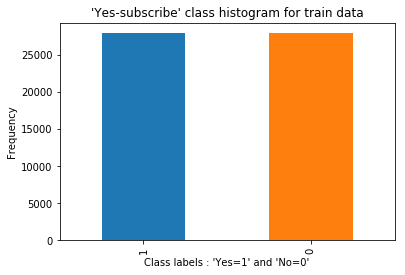

In [57]:
pd.value_counts(ytrainSMOTE['y_yes']).plot.bar()
plt.title("'Yes-subscribe' class histogram for train data")
plt.xlabel("Class labels : 'Yes=1' and 'No=0'")
plt.ylabel('Frequency')


In [58]:
print(xtrain.shape)
xtrainSMOTE.reshape(-1,3)
print(xtrainSMOTE.shape)

(31647, 50)
(55890, 50)


In [59]:
top3features.index

Int64Index([1, 0, 2], dtype='int64')

In [60]:
OrigxtrainSMOTE =xtrainSMOTE
SubxtrainSMOTE = xtrainSMOTE[0::,top3features.index]


In [61]:
SubxtrainSMOTE
#top3features.index

array([[ 3.12000000e+02,  3.00000000e+01,  2.00000000e+01],
       [-1.03400000e+03,  4.60000000e+01,  7.00000000e+00],
       [ 8.55000000e+02,  3.50000000e+01,  1.20000000e+01],
       ...,
       [ 1.15413015e+04,  3.60000000e+01,  2.37963487e+01],
       [ 6.86685299e+02,  2.48426497e+01,  2.55786751e+01],
       [ 2.88217095e+03,  3.22927377e+01,  2.87821307e+00]])

# Training the Logistic Regression Model classifier
   - Using top3 features revealed based on Feature importance ranking using Random Forest Classifier

In [62]:
test.columns

Index(['age', 'balance', 'day', 'campaign', 'pdays', 'previous', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'y_yes'],
      dtype='object')

In [63]:
# Pre-processing step to normalize features
from sklearn.preprocessing import normalize as norml

Origxtest = test.drop('y_yes',axis=1)

xtest = test[top3features]
ytest = test["y_yes"]

SubxtrainSMOTEnorm = norml(SubxtrainSMOTE)
xtestnorm = norml(xtest)

In [64]:
SubxtrainSMOTE

array([[ 3.12000000e+02,  3.00000000e+01,  2.00000000e+01],
       [-1.03400000e+03,  4.60000000e+01,  7.00000000e+00],
       [ 8.55000000e+02,  3.50000000e+01,  1.20000000e+01],
       ...,
       [ 1.15413015e+04,  3.60000000e+01,  2.37963487e+01],
       [ 6.86685299e+02,  2.48426497e+01,  2.55786751e+01],
       [ 2.88217095e+03,  3.22927377e+01,  2.87821307e+00]])

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# create an instance of the class (class object) usiing default parameters
LogRegr = LogisticRegression()

LogRegr = LogisticRegression(penalty='l1', solver='liblinear')




In [66]:
SubxtrainSMOTE_arr = np.array(SubxtrainSMOTEnorm)
ytrainSMOTE_arr = np.array(ytrainSMOTE)

In [67]:

resultROC = cross_val_score(LogRegr,SubxtrainSMOTEnorm,ytrainSMOTE_arr.ravel(),cv=5,scoring='roc_auc')


In [68]:
print(resultROC.mean())


0.5921147574051873


In [69]:
LogRegr.fit(SubxtrainSMOTEnorm,ytrainSMOTE_arr.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [70]:
LogRegr.coef_

array([[ 0.431666  , -0.02691717, -1.040218  ]])

In [71]:
LogRegr.intercept_

array([-0.24923626])

In [72]:
testPredY = [x[1] for x in LogRegr.predict_proba(norml(xtest))]
testPredY

AUCResultLogisXtop3= roc_auc_score(ytest,testPredY)
AUCResultLogisXtop3

0.591563019416705

# Training 2nd version of the Logistic Regression Model classifier
   - subset and drop features based on the redundant features identified & Retrain Logistic Regression Classifier based on new feature set where redundant features were dropped. Recall result after VIF.

##### Subset and drop based on the redundant features identified


In [73]:
OrigxtrainSMOTE[0::,pd.Series(newfeatures).index]
#SubxtrainSMOTE = xtrainSMOTE[0::,top3features.index]
resultROC = cross_val_score(LogRegr,norml(OrigxtrainSMOTE[0::,pd.Series(newfeatures).index]),ytrainSMOTE_arr.ravel(),cv=5,scoring='roc_auc')
resultROC.mean()

0.6904988683103561

##### Retrain Logistic Regression Classifier based on new feature set where redundant features were dropped.
Recall result after VIF. 

In [74]:
LogRegr.fit(norml(OrigxtrainSMOTE[0::,pd.Series(newfeatures).index]),ytrainSMOTE_arr.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [75]:
LogRegr.coef_

array([[ -0.34132813,   0.46574051,  -0.8625365 ,  -7.15460309,
          0.73118185,  14.81846595,   0.        ,  -0.88413536,
          0.        ,   0.        ,   0.        ,  24.53876586,
          0.        ,   0.        ,   0.        ,  -5.25341386,
          0.        ,   0.        ,   0.        , -23.09605624,
          3.17554771,  -2.90257476,   0.        ,  19.61124948,
          0.        ,   0.        ,   0.        ,  25.19759256,
        -10.6947931 ,   4.02460662,  -9.71915653,  35.43129379,
          0.        , -39.17154201,  31.29264663, -35.11688412]])

In [76]:
LogRegr.intercept_

array([-0.32575849])

In [77]:
testPredY = [x[1] for x in LogRegr.predict_proba(norml(Origxtest[newfeatures.values]))]
testPredY

AUCResultLogisXafterVIF= roc_auc_score(ytest,testPredY)
AUCResultLogisXafterVIF

0.4639713252122228

# Naive Bayes Classifier

In [78]:
#Note, we are NOT using a subset of the features
SubxtrainSMOTE.shape

(55890, 3)

In [79]:
OrigxtrainSMOTE.shape

(55890, 50)

In [80]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()


In [81]:
resultROCgnb = cross_val_score(gnb,OrigxtrainSMOTE,ytrainSMOTE_arr.ravel(),cv=5,scoring='roc_auc')
print(resultROCgnb.mean())

0.7988818360170645


In [82]:
gnb.fit(OrigxtrainSMOTE,ytrainSMOTE_arr.ravel())

GaussianNB(priors=None)

In [83]:
gnb.class_prior_

array([0.5, 0.5])

In [84]:
#gnb.fit(xtrainSMOTE,ytrain)
YPredOrigx_gnb = [x[1] for x in gnb.predict_proba(Origxtest)]
AUCResultNB = roc_auc_score(ytest,YPredOrigx_gnb)
AUCResultNB

0.7470029065896571

# Decision Tree

In [85]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

Dtree = tree.DecisionTreeClassifier()

In [86]:
#Dtree.params = {'max_depth' : [x for x in np.arange(3,5)],'min_samples_split' : [int(x) for x in nrows_train*np.arange(0.1,0.6,0.1)],'min_samples_leaf' : [int(x) for x in nrows_train*np.arange(0.1,0.6,0.1)],'max_leaf_nodes' :[x for x in np.arange(10,16,1)]}

#Dtree_CV = GridSearchCV(estimator=Dtree,param_grid=Dtree.params,cv=5,scoring='roc_auc')

In [87]:
nrows_train = len(OrigxtrainSMOTE)
nrows_train

55890

In [88]:
Dtree.params = {'max_depth' : [x for x in np.arange(3,6)],'min_samples_split' : [int(x) for x in nrows_train*np.arange(0.1,0.6,0.1)],'min_samples_leaf' : [int(x) for x in nrows_train*np.arange(0.1,0.8,0.1)]}
Dtree_CV = GridSearchCV(estimator=Dtree,param_grid=Dtree.params,cv=5,scoring='roc_auc')

In [89]:
Dtree_CV.fit(OrigxtrainSMOTE,ytrainSMOTE_arr.ravel())

Dtree_CV.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5589, min_samples_split=5589,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [90]:
Dtree_CV.best_score_

0.8177681116522337

In [91]:
PredTresult = [x[1] for x in Dtree_CV.best_estimator_.predict_proba(Origxtest)]
#print(PredTresult)
AUCResultDtree = roc_auc_score(ytest,PredTresult)
print(AUCResultDtree)


0.6651027312956849


# Gradient Boosted Tree

In [92]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [93]:
GBC = GradientBoostingClassifier(random_state=4)

In [169]:
#GBC.params = {'max_depth' : [x for x in np.arange(6,10)],'min_samples_split' : [int(x) for x in nrows_train*np.arange(0.1,0.6,0.2)],'min_samples_leaf' : [int(x) for x in nrows_train*np.arange(0.1,0.9,0.1)],'max_leaf_nodes' :[x for x in np.arange(5,10,1)]}

#GBC_CV = GridSearchCV(estimator= GBC,param_grid= GBC.params)

In [94]:
GBCparams = {'n_estimators' : [200],'max_depth' : [x for x in np.arange(3,6)],'min_samples_split' : [int(x) for x in nrows_train*np.arange(0.02,0.06,0.02)],'min_samples_leaf' : [int(x) for x in nrows_train*np.arange(0.02,0.06,0.02)]}

GBC_CV = GridSearchCV(estimator= GBC,param_grid= GBCparams,n_jobs=3)

In [171]:
#Previously used : result on train_cross val = 0.5, result on test =0.64
#GBCparams = {'max_depth' : [x for x in np.arange(3,7)],'min_samples_split' : [int(x) for x in nrows_train*np.arange(0.02,0.06,0.02)],'min_samples_leaf' : [int(x) for x in nrows_train*np.arange(0.4,0.8,0.1)]}

#GBC_CV = GridSearchCV(estimator= GBC,param_grid= GBCparams,n_jobs=3)

In [95]:
GBC_CV.fit(OrigxtrainSMOTE,ytrainSMOTE_arr.ravel())

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=4, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'n_estimators': [200], 'max_depth': [3, 4, 5], 'min_samples_split': [1117, 2235], 'min_samples_leaf': [1117, 2235]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [96]:
GBC_CV.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=2235, min_samples_split=1117,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=4, subsample=1.0, verbose=0,
              warm_start=False)

In [97]:
GBC_CV.best_score_

0.9232420826623725

In [98]:
PredTresult = [x[1] for x in GBC_CV.best_estimator_.predict_proba(Origxtest)]

AUCResultGBC = roc_auc_score(ytest,PredTresult)
AUCResultGBC

0.7843365926258894

# Extreme Gradient boosted Machine

In [99]:
from xgboost import XGBClassifier

In [100]:
xgb = XGBClassifier(learning_rate=0.01,n_estimators=200, objective='binary:logistic',
                    silent=True, nthread=1)

In [114]:
#Gridparams = {
#        'min_child_weight': [1, 5, 10],
#        'gamma': [0.5,1.5],
#        'subsample': [0.6, 0.8],
#        'colsample_bytree': [0.5, 0.7],
#        'max_depth': [3,6]
#        }


In [101]:
Gridparams = {
        'min_child_weight': [1,5,10],
        'gamma': [0.5,0.7],
        'subsample': [0.6,0.8],
        'colsample_bytree': [0.5, 0.7],
        'max_depth': [3,6]
        }


In [102]:
grd_sch = GridSearchCV(estimator= xgb, n_jobs=3,param_grid= Gridparams,scoring = 'roc_auc',cv=5,return_train_score='True')

In [103]:
OrigxtrainSMOTE.shape

(55890, 50)

In [104]:
# code ref. : https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost
grd_sch.fit(OrigxtrainSMOTE,ytrainSMOTE_arr.ravel())


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'min_child_weight': [1, 5, 10], 'gamma': [0.5, 0.7], 'subsample': [0.6, 0.8], 'colsample_bytree': [0.5, 0.7], 'max_depth': [3, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='True',
       scoring='roc_auc', verbose=0)

In [105]:
grd_sch.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.5, learning_rate=0.01,
       max_delta_step=0, max_depth=6, min_child_weight=5, missing=None,
       n_estimators=200, n_jobs=1, nthread=1, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.6)

In [106]:
# Continue below after training finished 

In [107]:
grd_sch.best_score_

0.9635958198312824

In [108]:
#result = grd_sch.predict(xtest)
#result
#xtest.to_numpy()
type(Origxtest)
Origxtest_arr = np.array(Origxtest)

In [109]:
Origxtest_arr.shape

(13564, 50)

In [110]:
Predresult = [x[1] for x in grd_sch.best_estimator_.predict_proba(Origxtest_arr)]
#Predresult
AUCResultXGB = roc_auc_score(np.array(ytest),Predresult)
AUCResultXGB

0.7726722752951349

# Exreme Gradient boosted Machine

#### No SMOTE, using inbuilt technique for handling imbalanced class

In [111]:
n_yes0 = len(ytrain[ytrain==0])
n_yes1 = len(ytrain[ytrain==1])

In [112]:
Ratio_0to1 = n_yes0/n_yes1
Ratio_0to1

7.548622366288493

In [113]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.01, n_estimators=200, objective='binary:logistic',
                    silent=True, nthread=1,scale_pos_weight=Ratio_0to1)

In [114]:
#Gridparams = {
#        'min_child_weight': [1, 5, 10],
#        'gamma': [0.5, 1, 1.5, 2, 5],
#        'subsample': [0.6, 0.8, 1.0],
#        'colsample_bytree': [0.6, 0.8, 1.0],
#        'max_depth': [6,8,10]
#        }


In [115]:
Gridparams = {
        'min_child_weight': [1,5,10],
        'gamma': [0.5,0.7],
        'subsample': [0.6,0.8],
        'colsample_bytree': [0.5, 0.7],
        'max_depth': [3,6]
        }


In [116]:
from sklearn.model_selection import GridSearchCV
grd_sch = GridSearchCV(estimator= xgb, param_grid= Gridparams,scoring = 'roc_auc',cv=5,n_jobs=3,return_train_score='True')

In [117]:
xtrain.shape

(31647, 50)

##### Note NO SMOTE on xtrain & ytrain & NO subset of features, just original train dataset with all features

In [118]:
# code ref. : https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost
grd_sch.fit(xtrain,ytrain)


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=7.548622366288493,
       seed=None, silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'min_child_weight': [1, 5, 10], 'gamma': [0.5, 0.7], 'subsample': [0.6, 0.8], 'colsample_bytree': [0.5, 0.7], 'max_depth': [3, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='True',
       scoring='roc_auc', verbose=0)

In [119]:
grd_sch.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0.7, learning_rate=0.01,
       max_delta_step=0, max_depth=6, min_child_weight=10, missing=None,
       n_estimators=200, n_jobs=1, nthread=1, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1,
       scale_pos_weight=7.548622366288493, seed=None, silent=True,
       subsample=0.6)

In [120]:
grd_sch.best_score_

0.7873097351203717

In [121]:
type(Origxtest)
Origxtest_arr = np.array(Origxtest)
Origxtest_arr.shape

(13564, 50)

In [122]:
Predresult = [x[1] for x in grd_sch.best_estimator_.predict_proba(Origxtest)]
Predresult
AUCResultXGBnoSmote  = roc_auc_score(np.array(ytest),Predresult)
AUCResultXGBnoSmote

0.7875757615454826

#### Results across all models

In [143]:
Results = {'XGB_noSMOTE_prebuiltbalancer' : {'AUC' : AUCResultXGBnoSmote},
          'XGB' : {'AUC': AUCResultXGB}, 
          'GradientBoostedTree' : {'AUC': AUCResultGBC},
          'DecisionTree' : {'AUC' : AUCResultDtree},
          'NaiveBayesClassifier' : {'AUC' : AUCResultNB},
          'Logistic_Reg_top3features' : {'AUC' : AUCResultLogisXtop3},     
          'Logistic_Reg_afterVIF' : {'AUC' : AUCResultLogisXafterVIF}}  

In [144]:
ModelNames = [m[0] for m in Results.items()] 
ModelNames



['XGB_noSMOTE_prebuiltbalancer',
 'XGB',
 'GradientBoostedTree',
 'DecisionTree',
 'NaiveBayesClassifier',
 'Logistic_Reg_top3features',
 'Logistic_Reg_afterVIF']

In [145]:
AUC = [m[1]['AUC'] for m in Results.items()] 

In [146]:
dfplot = pd.DataFrame()
dfplot['ModelNames']= ModelNames
dfplot['AUC'] =AUC
dfplot

,ModelNames,AUC
0,XGB_noSMOTE_prebuiltbalancer,0.787576
1,XGB,0.772672
2,GradientBoostedTree,0.784337
3,DecisionTree,0.665103
4,NaiveBayesClassifier,0.747003
5,Logistic_Reg_top3features,0.591563
6,Logistic_Reg_afterVIF,0.463971


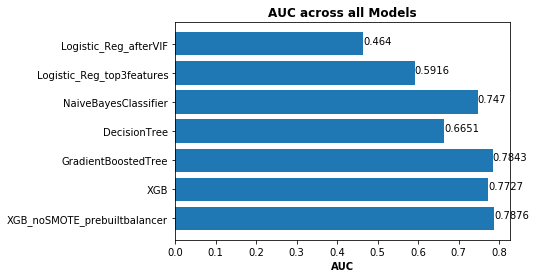

In [147]:
plt.barh(ModelNames,AUC)
plt.xlabel("AUC",fontweight='bold')
plt.title("AUC across all Models",fontweight='bold')

for i,v in enumerate(AUC) :
    v= round(v,4)
    plt.text(v,i,str(v),color='black')

## <font color = "blue" > Conclusion 
 **Extreme Gradient Boosted Machine emerged as the best performing model** as it had an AUC of 0.7876. 
   However, Gradient Boosted Tree followed closely in 2nd place with an AUC of 0.7843.
   Note also, that a simple classifier such as Naive Bayes performed well with an AUC = 0.747, 
   the best of the non-ensemble models with a result sgnificantly higher than Logistic regression and Decision Tree.

## Future work
Note that more time could have been sent tuning the models particularly the XGB.
However time would not permit.

## References
References :
Feature Impt. Decision Trees & Random Forest

https://medium.com/@srnghn/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3

Perform feature selection on training dataset only

https://machinelearningmastery.com/an-introduction-to-feature-selection/



Decision Tree Hyper-parameters:

https://stackoverflow.com/questions/46480457/difference-between-min-samples-split-and-min-samples-leaf-in-sklearn-decisiontre


Gradient Boosting :

https://stats.stackexchange.com/questions/173390/gradient-boosting-tree-vs-random-forest

http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/

SMOTE :
https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis

AUC :
https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5